In [1]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

%matplotlib inline

In [83]:
shape_file = gpd.read_file("/workspaces/Emergency-Services-Comparison/maps/countries/ne_50m_admin_0_countries.shp")
shape_file.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,1,Zimbabwe,...,None,None,None,None,None,None,None,None,None,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,1,Zambia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,1,Yemen,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,1,Vietnam,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,1,Venezuela,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


<Axes: >

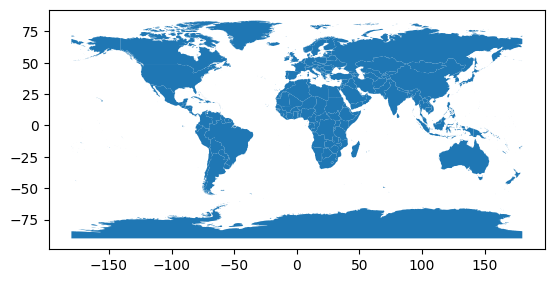

In [84]:
shape_file.plot()

<Axes: >

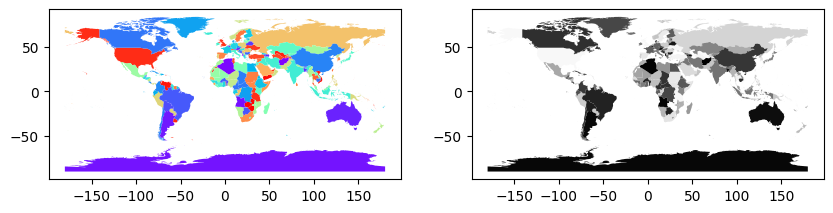

In [92]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

# Use the 'name' column for coloring
shape_file.plot(column='SOVEREIGNT', ax=ax1, cmap='rainbow')

shape_file.plot(column='SOVEREIGNT', ax=ax2, cmap='Greys_r')

In [93]:
countries = shape_file.SOVEREIGNT.iloc()[:]
countries.head()

0     Zimbabwe
1       Zambia
2        Yemen
3      Vietnam
4    Venezuela
Name: SOVEREIGNT, dtype: object

In [97]:

df_map = gpd.GeoDataFrame({
    'country': idk['SOVEREIGNT'],
    'geometry': idk['geometry']
})
df_map.head()

,country,geometry
0,Zimbabwe,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Vietnam,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Venezuela,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


In [98]:

df_map_color = gpd.GeoDataFrame({
    'country': df_map['country'],
    'geometry': df_map['geometry'],
    'color': [(i, i, i) for i in df_map.index]
})
df_map_color.head()

,country,geometry,color
0,Zimbabwe,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344...","(0, 0, 0)"
1,Zambia,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643...","(1, 1, 1)"
2,Yemen,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16...","(2, 2, 2)"
3,Vietnam,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ...","(3, 3, 3)"
4,Venezuela,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9...","(4, 4, 4)"


colormap explanation: https://matplotlib.org/stable/users/explain/colors/colormaps.html

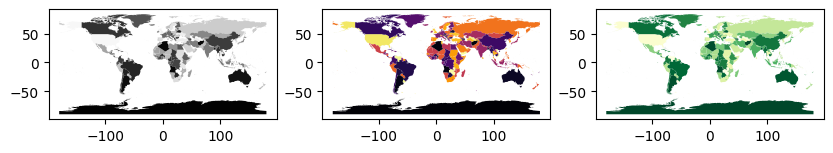

In [99]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 10))

# Use the 'color' column for coloring
df_map_color.plot(column='color', ax=ax1, cmap='Greys')
df_map_color.plot(column='color', ax=ax2, cmap='inferno_r')
df_map_color.plot(column='color', ax=ax3, cmap='YlGn')

plt.show()

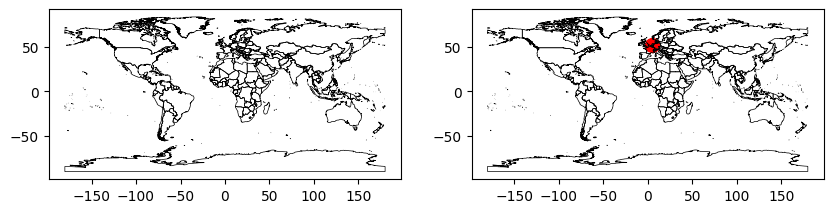

In [100]:
from shapely.geometry import Point

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

#  Plot the countries with boundaries outlined
df_map.boundary.plot(ax=ax1, linewidth=0.5, color = "black")

#  Plot the countries with boundaries outlined
df_map.boundary.plot(ax=ax2, linewidth=0.5, color = "black")
#here create a geodataframe with the point 52.08340603517653, 5.1501312031412105 and plot it on ax2


# Create a GeoDataFrame with a single point
point_geometry = gpd.GeoDataFrame(geometry=[Point(5.1501312031412105, 52.08340603517653)])

# Plot the point on ax2
point_geometry.plot(ax=ax2, color='red', markersize=100)

# Show the plot
plt.show()

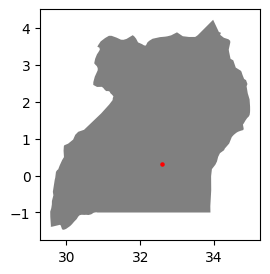

In [102]:
country_name = 'Uganda'  # Replace with the country you want to plot
selected_country = df_map[df_map['country'] == country_name]

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(3,3))

# Plot the selected country
selected_country.plot(ax=ax, color='grey', zorder=1)  # You can choose any color you want

# Create a GeoDataFrame with a single point
Kampala = gpd.GeoDataFrame(geometry=[Point(32.57851235426574, 0.3146358586289159)])

# Plot the point on ax
Kampala.plot(ax=ax, color='red', markersize=5, zorder=2)

# Show the plot
plt.show()


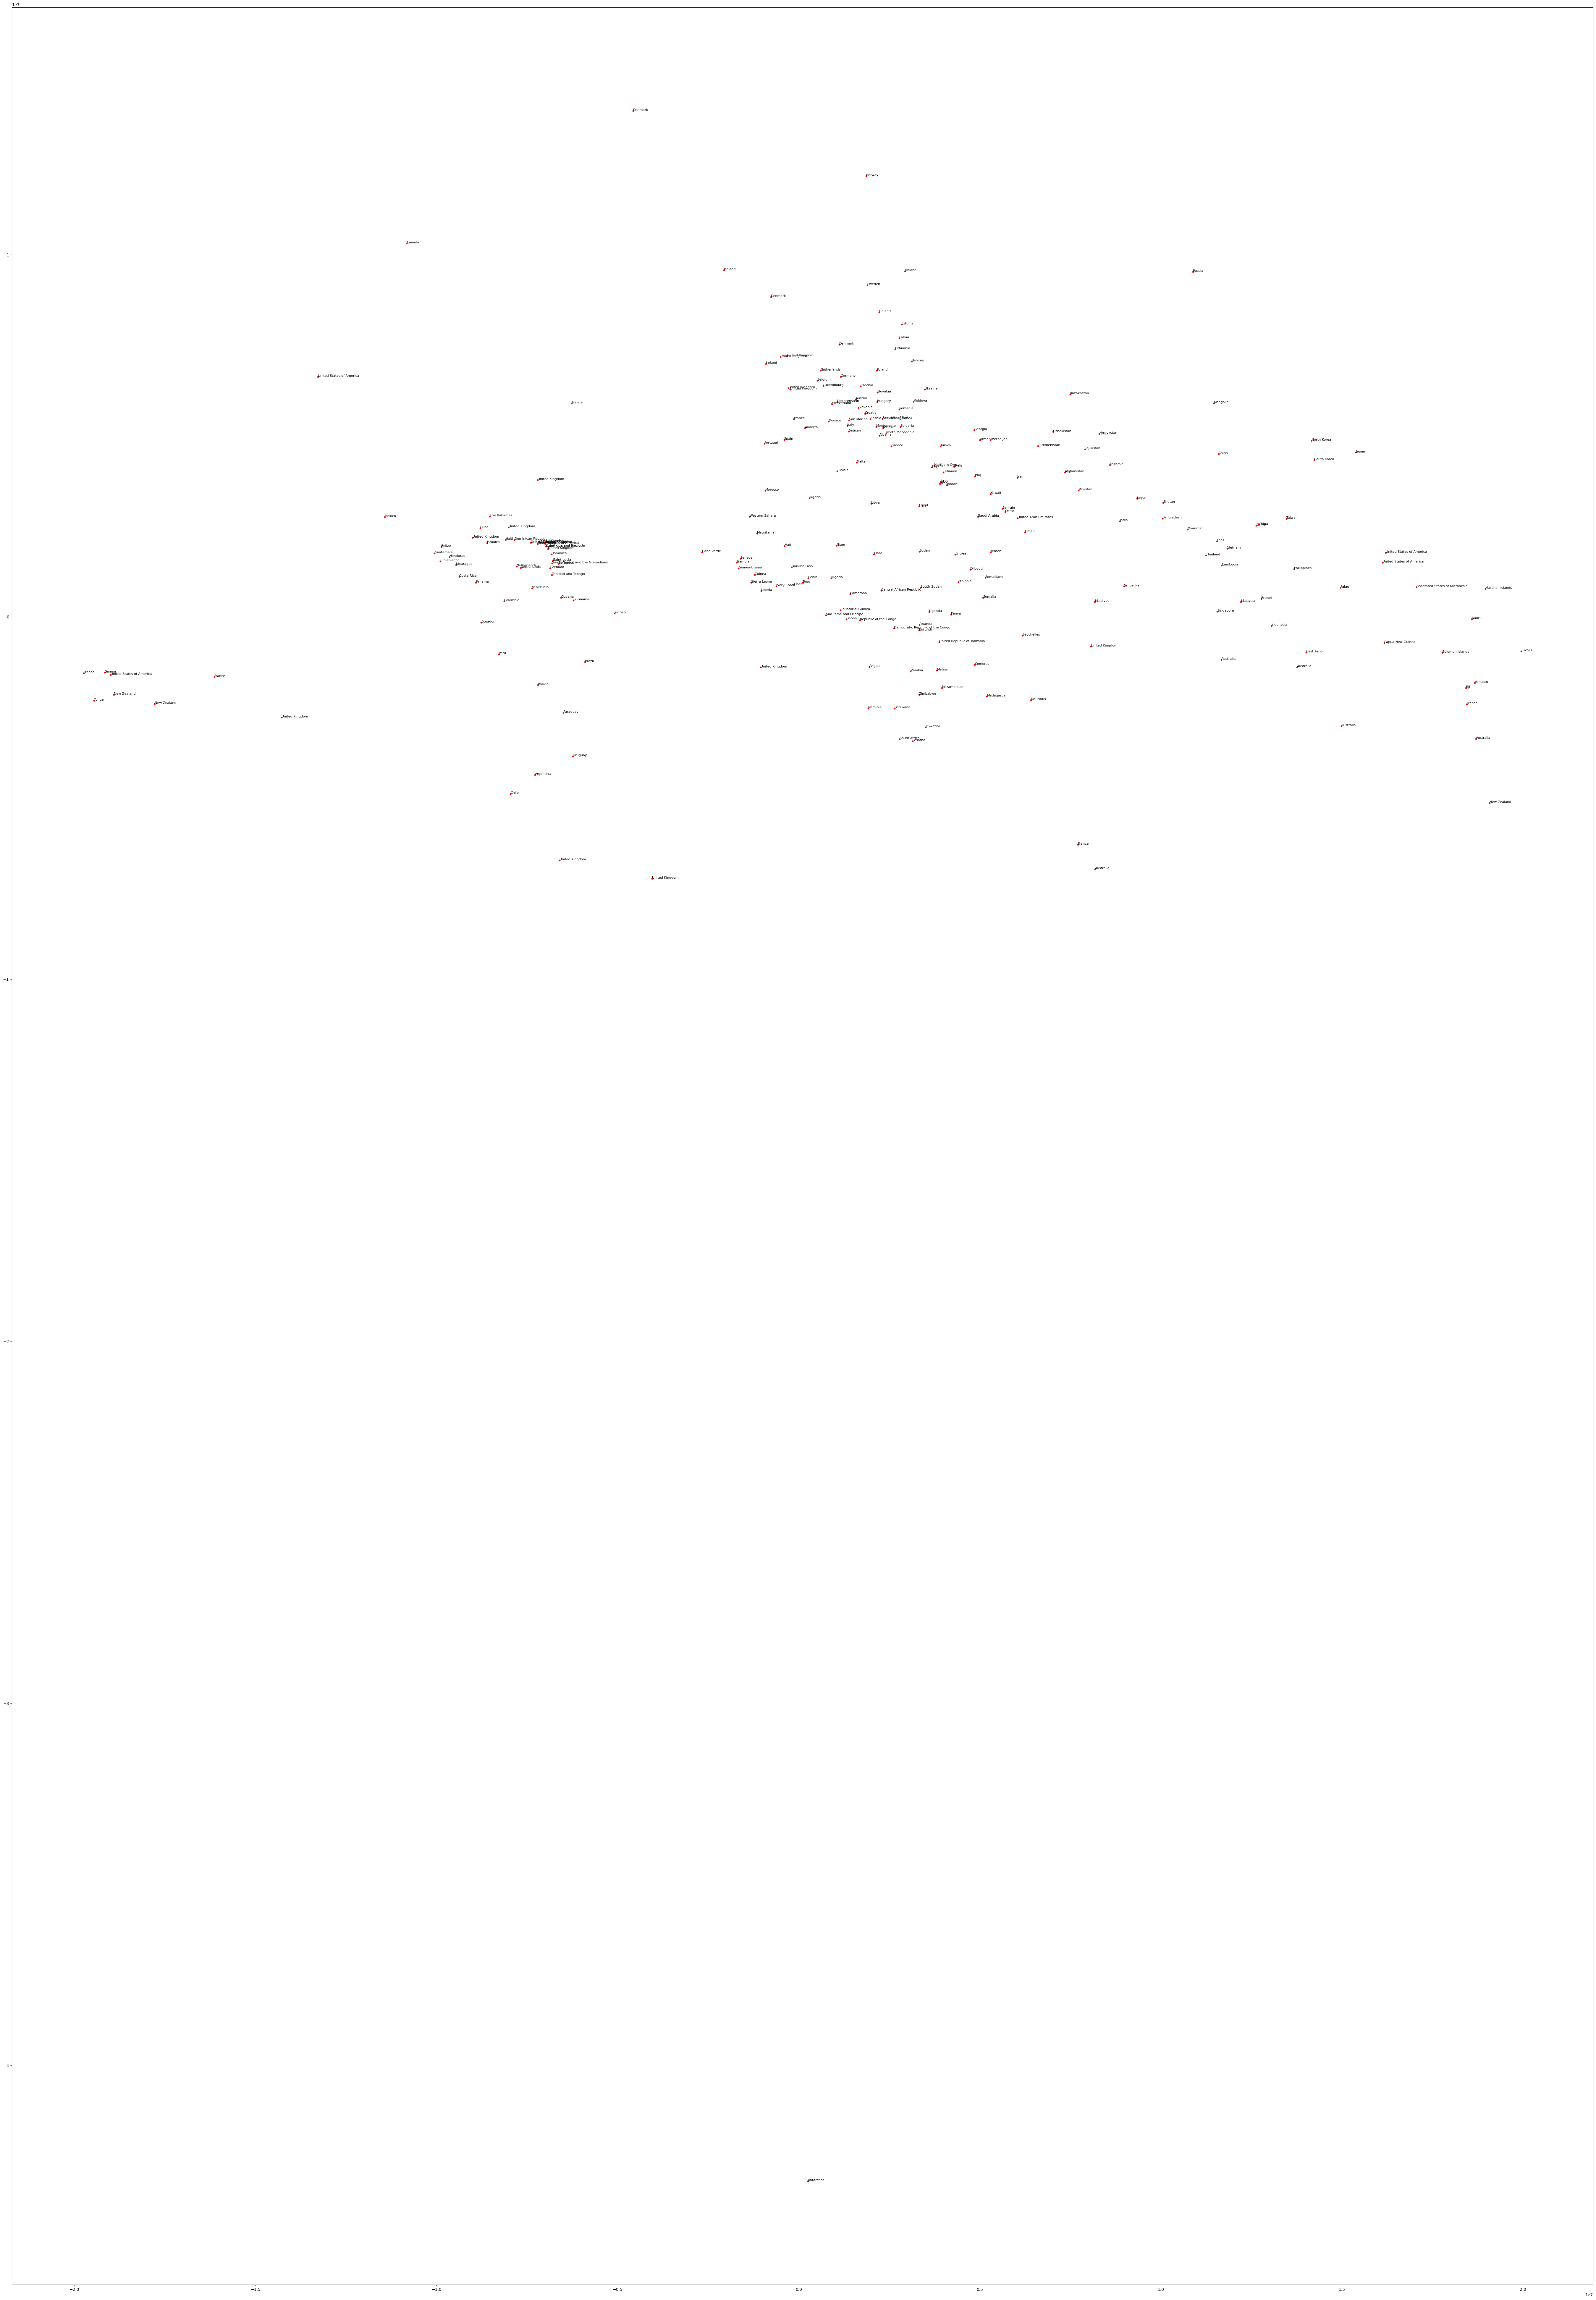

In [104]:
df_centroids = df_map[['country', 'geometry']].copy()
df_centroids = df_centroids.to_crs(epsg=3395)
df_centroids['centroid'] = df_centroids['geometry'].centroid

# Set up the plot
fig, ax = plt.subplots(figsize=(100, 100))

# Plot the countries
df_map.plot(ax=ax, color='lightgray', edgecolor='black', zorder=2)

# Plot the centroids
df_centroids['centroid'].plot(ax=ax, color='red', markersize=10, zorder=1)

# Add labels for countries (optional)
for x, y, label in zip(df_centroids['centroid'].x, df_centroids['centroid'].y, df_centroids['country']):
    ax.text(x, y, label, fontsize=8)

plt.savefig('../output/centrepoints.png')

# Show the plot
plt.show()